# Timeseries

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\exchange_rate.csv")

In [2]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.shape

(7588, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

<Axes: >

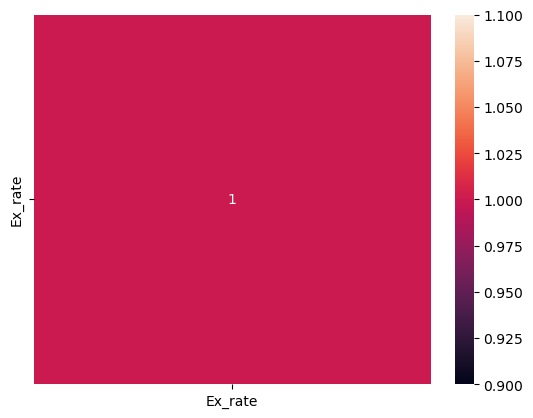

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

z = df.corr(numeric_only=True)

sns.heatmap(z, annot=True)

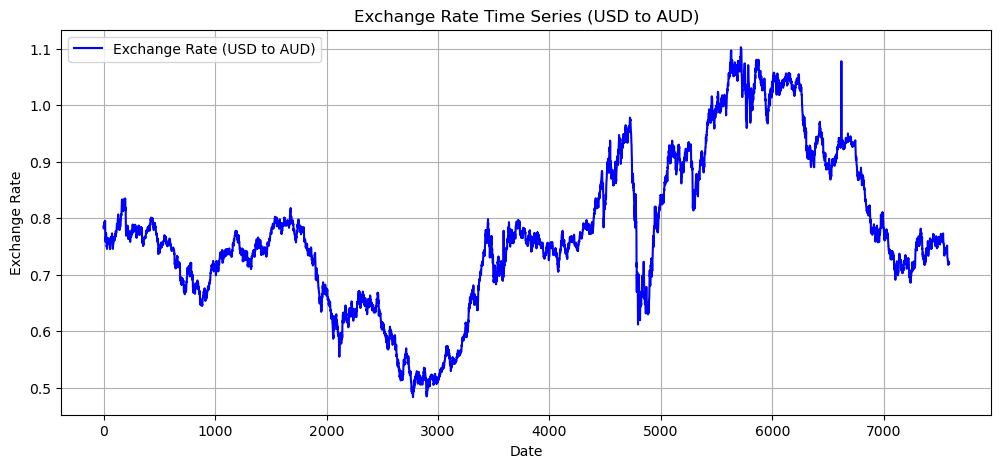

In [8]:
# Plot the time series

import numpy as np
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Ex_rate'], label="Exchange Rate (USD to AUD)", color='b')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Time Series (USD to AUD)")
plt.legend()
plt.grid()
plt.show()

### Now checking for stationarity using the Augmented Dickey-Fuller (ADF) test and plot ACF/PACF to determine ARIMA parameters. 

In [9]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

adf_test = adfuller(df['Ex_rate'])

In [10]:
# ADF Test Results
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
    "Stationary": adf_test[1] < 0.05  
}

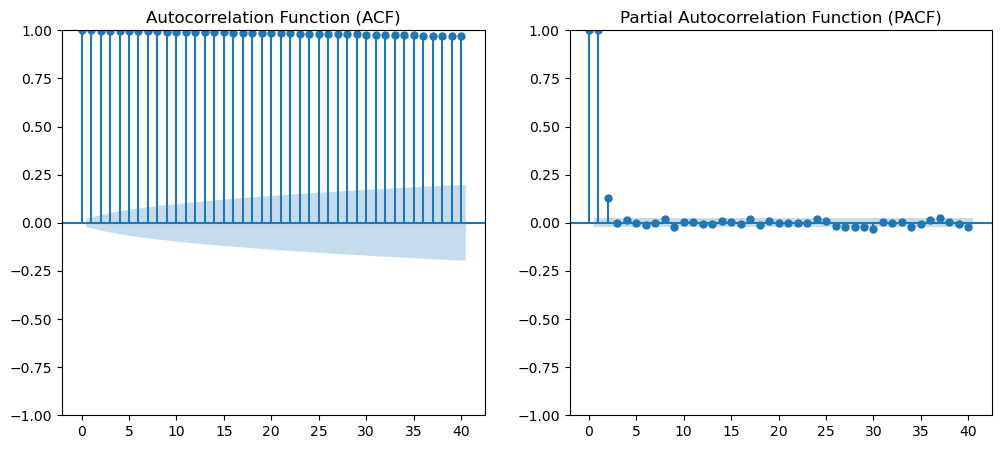

In [11]:
# Plot ACF and PACF to determine ARIMA parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [12]:
adf_result

{'ADF Statistic': -1.664994180738078,
 'p-value': 0.44923273535982894,
 'Critical Values': {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 'Stationary': False}

- The Augmented Dickey-Fuller (ADF) test result shows:

- ADF Statistic: -1.665

- p-value: 0.449 (greater than 0.05)

- Conclusion: The series is not stationary, meaning it has trends or seasonality that need to be removed.

### To make it stationary, we'll apply differencing and then re-evaluate. 

In [16]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

0       0.785500
1       0.781800
2       0.786700
3       0.786000
4       0.784900
          ...   
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: Ex_rate, Length: 7588, dtype: float64


In [19]:
adf_test_diff = adfuller(df['Ex_rate'])

In [21]:
# ADF Test Results after differencing
adf_result_diff = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4],
    "Stationary": adf_test_diff[1] < 0.05  
}

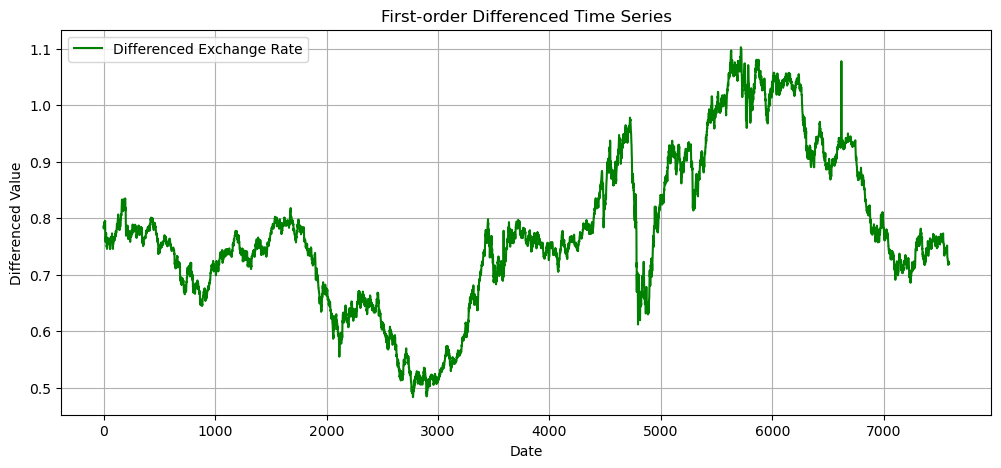

In [24]:
# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Ex_rate"], label="Differenced Exchange Rate", color='g')
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.title("First-order Differenced Time Series")
plt.legend()
plt.grid()
plt.show()

- After first-order differencing, the ADF test shows:

- ADF Statistic: -99.39

- p-value: 0.0 (significantly below 0.05)

- Conclusion: The series is now stationary and suitable for ARIMA modeling.

### Estimating ARIMA parameters (p,d,q) based on the ACF/PACF plots and fit the model.

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Selecting ARIMA parameters based on ACF/PACF:
p, d, q = 1, 1, 1 

In [27]:
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_fit = arima_model.fit()

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
arima_summary = arima_fit.summary()
arima_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 29 Mar 2025   AIC                         -56102.322
Time:                        21:13:49   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The ARIMA(1,1,1) model has been successfully fitted. Key observations:

- AIC: -56102.322 (lower is better)

- AR(1) coefficient: -0.1268 (statistically significant, p = 0.005)

- MA(1) coefficient: -0.0046 (not significant, p = 0.920)

- Sigma²: Very low, indicating good model fit